In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5py
import math
import cv2
import pickle

import torch
from torch.utils.data import Dataset, DataLoader
# from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms as T
from dataset import *

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device('cuda:0')
torch.manual_seed(17)

import math
import copy
import os, sys

In [2]:
def fix_gaze_point(dataset):
    dataset.gaze_point[:,1][dataset.gaze_point[:,1]>=1080]=1080-1
    dataset.gaze_point[:,0][dataset.gaze_point[:,0]>=1920]=1920-1
    return dataset

In [4]:
# if __name__ =='__main__':
# 	device = int(sys.argv[1])
# 	if device==-1:
# 		device = torch.device('cpu')
# 	else:
# 		device = torch.device(f'cuda:{device}')


## Path
DGAZE_extracted_data = '../../DGAZE_extracted_data/DGAZE_extracted_data.pkl'
DGAZE_data_split = '../../DGAZE_extracted_data/DGAZE_data_split.pkl'
dump_path = '../../results/save_models/run1/'

## Training Params
batch_size = 32
learning_rate = 0.001
nepochs = 300

# Load dictionary
with open(DGAZE_extracted_data, 'rb') as file:
    driver_data = pickle.load(file)
    
# Load dictionary
with open(DGAZE_data_split, 'rb') as file:
    data_split = pickle.load(file)

In [5]:
train_dataset = DGazeDataset(driver_data, data_split['drivers_train'][:2], data_split['sequence_train'])
val_dataset = DGazeDataset(driver_data, data_split['drivers_val'][:2], data_split['sequence_val'])
test_dataset = DGazeDataset(driver_data, data_split['drivers_test'][:2], data_split['sequence_test'])

print(len(train_dataset), len(val_dataset), len(test_dataset))

 19%|█▉        | 14/72 [00:00<00:00, 122.50it/s]

==> driver22


  1%|▏         | 1/72 [00:00<00:08,  8.73it/s]

==> driver8


 73%|███████▎  | 11/15 [00:00<00:00, 99.66it/s]

Data loaded!
==> driver16


 27%|██▋       | 4/15 [00:00<00:00, 33.35it/s]

==> driver5


 73%|███████▎  | 11/15 [00:00<00:00, 98.18it/s]

Data loaded!
==> driver14


 27%|██▋       | 4/15 [00:00<00:00, 31.30it/s]

==> driver3


100%|██████████| 15/15 [00:00<00:00, 22.54it/s]

Data loaded!
15770 3399 3719


In [10]:
def plot_gaze_points(gaze_point):
    cap = cv2.VideoCapture('/pfs01/performance-tier/rd_algo/algo_bin/ishadua/codes/old_codes/DGAZE/dataset/driver12/road_view/sample56.avi')
    ret, frame = cap.read()
    print(frame.shape)
  
    plt.figure()
    plt.imshow(frame)
    plt.scatter(gaze_point[:,0], gaze_point[:,1], c='r')

(1080, 1920, 3)


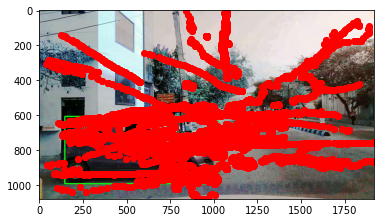

In [11]:
plot_gaze_points(fix_gaze_point(train_dataset).gaze_point)

(1080, 1920, 3)


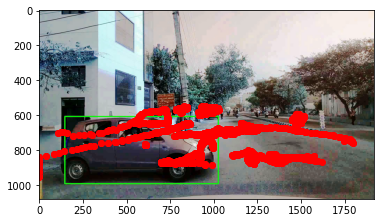

In [12]:
plot_gaze_points(fix_gaze_point(val_dataset).gaze_point)

(1080, 1920, 3)


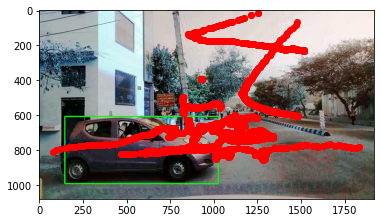

In [13]:
plot_gaze_points(fix_gaze_point(test_dataset).gaze_point)